# Skin Tracking Algorithm

### Imports


In [346]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Import Selfie

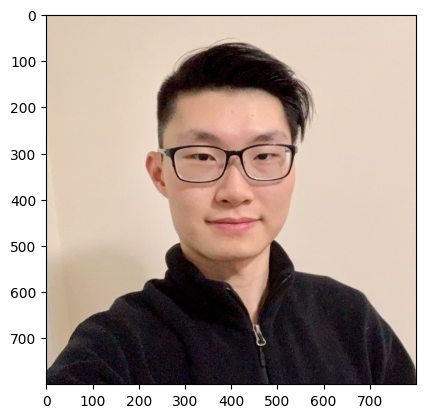

In [347]:
img = cv2.imread('./photo.jfif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)




### Create Histogram for Entire Image

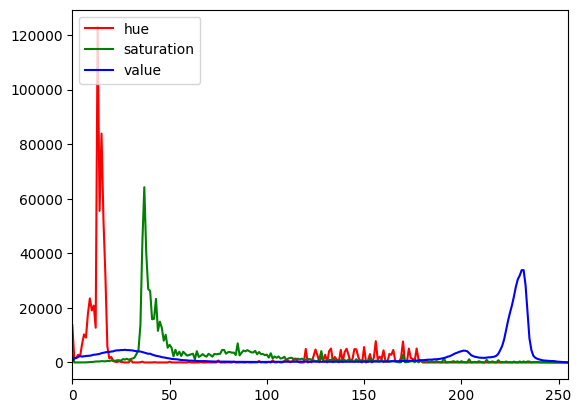

In [348]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')
# Plot a histogram.
plt.show()  

### Modify Brightness and Contrast

In [349]:
def adjust_brightness_contrast(image_array, alpha, beta):
    # Convert to floating point to avoid overflow and underflow
    temp = image_array.astype('float32')
    # Adjust contrast
    temp *= alpha
    # Adjust brightness
    temp += beta
    # Clip values to be in the range [0, 255]
    temp = np.clip(temp, 0, 255)
    return temp.astype('uint8')

img_contrast = adjust_brightness_contrast(img, 1.5, 40)


### Create Mask - Draw a rectangle


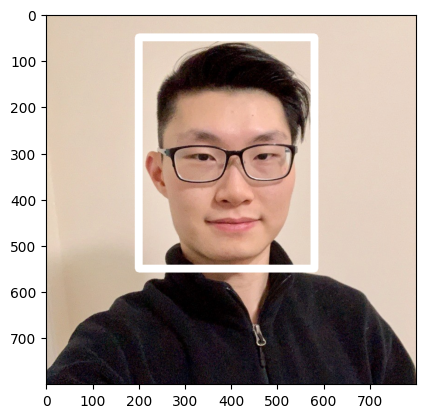

In [350]:
# Rectangle OpenCV function
# cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
top_left = (200,50)
bottom_right = (580,550)
rect_color = (0,0,255)
thickness = 15
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
img_rect = cv2.cvtColor(img_rect, cv2.COLOR_HSV2RGB)
plt.imshow(img_rect)

### Create a mask

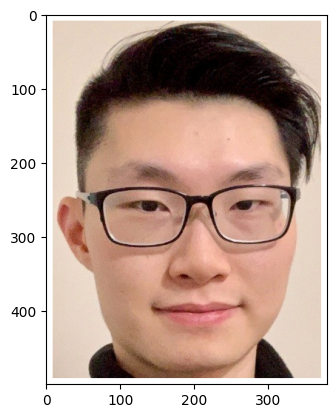

In [351]:
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
img_contrast = cv2.cvtColor(img_contrast, cv2.COLOR_HSV2RGB)

img = img[50:550, 200:580]
img_contrast = img_contrast[50:550, 200:580]
plt.imshow(img)

### Create HSV Histogram from Masked Image

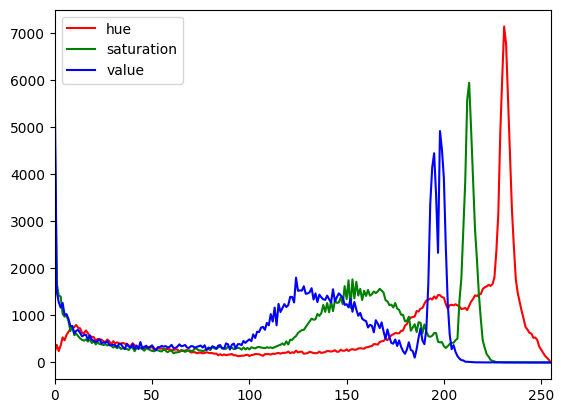

In [352]:
img_contrast = cv2.cvtColor(img_contrast, cv2.COLOR_RGB2HSV)

# Hue
hist = cv2.calcHist([img],[0],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Saturation
hist = cv2.calcHist([img],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Value
hist = cv2.calcHist([img],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,255])

# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')
# Plot a histogram.
plt.show()  

### Create Range

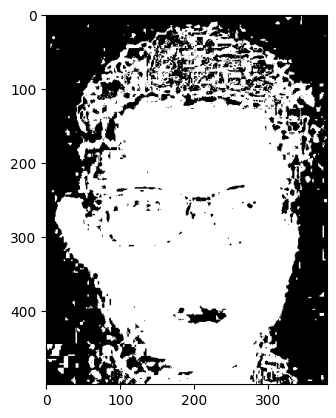

In [353]:
lower = np.array([40, 0, 0])
upper = np.array([58, 255, 255])

mask = cv2.inRange(img_contrast, lower, upper)
plt.imshow(mask, cmap='gray')

### Apply mask to image


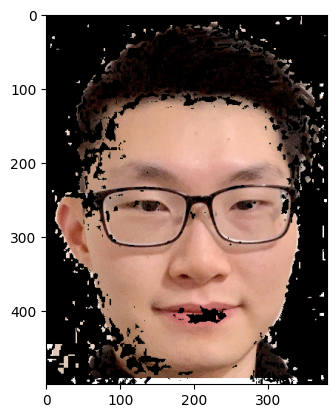

In [354]:
img_masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(img_masked)

